In [47]:
import dlib
import numpy as np
import cv2
import imutils
from skimage import io
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#landmarks Datensatz
predictor_path = "Pictures/Faces/shape_predictor_68_face_landmarks.dat"
#eigene Bilder
image_path = "Pictures/Faces/lali.jpg"

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

#Bild
image_p = cv2.imread(image_path)
image = imutils.resize(image_p, width=500)
#image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = image.astype(np.uint8)
image


array([[[208, 209, 213],
        [209, 210, 214],
        [210, 211, 215],
        ...,
        [223, 223, 223],
        [224, 224, 224],
        [225, 225, 225]],

       [[209, 210, 214],
        [210, 211, 215],
        [210, 211, 215],
        ...,
        [224, 224, 224],
        [225, 225, 225],
        [225, 225, 225]],

       [[209, 210, 214],
        [210, 211, 215],
        [210, 211, 215],
        ...,
        [224, 224, 224],
        [225, 225, 225],
        [225, 225, 225]],

       ...,

       [[185, 187, 188],
        [184, 186, 187],
        [184, 186, 187],
        ...,
        [227, 224, 220],
        [212, 209, 205],
        [228, 225, 221]],

       [[185, 187, 188],
        [184, 186, 187],
        [184, 186, 187],
        ...,
        [235, 232, 228],
        [222, 219, 215],
        [222, 219, 215]],

       [[184, 186, 187],
        [185, 187, 188],
        [183, 185, 186],
        ...,
        [230, 227, 223],
        [230, 227, 223],
        [224, 221, 217]]

In [216]:
#Array in 2d umwandeln
image = image/255
image = image.mean(axis=2)
image

array([[0.82352941, 0.82745098, 0.83137255, ..., 0.8745098 , 0.87843137,
        0.88235294],
       [0.82745098, 0.83137255, 0.83137255, ..., 0.87843137, 0.88235294,
        0.88235294],
       [0.82745098, 0.83137255, 0.83137255, ..., 0.87843137, 0.88235294,
        0.88235294],
       ...,
       [0.73202614, 0.72810458, 0.72810458, ..., 0.87712418, 0.81830065,
        0.88104575],
       [0.73202614, 0.72810458, 0.72810458, ..., 0.90849673, 0.85751634,
        0.85751634],
       [0.72810458, 0.73202614, 0.72418301, ..., 0.88888889, 0.88888889,
        0.86535948]])

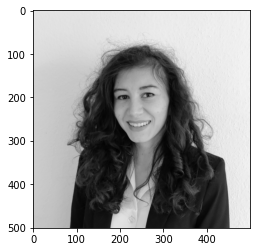

In [217]:
plt.imshow(image, cmap = "gray")

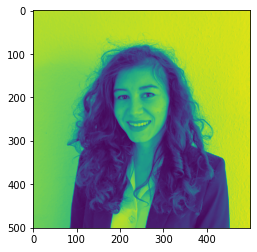

In [48]:
image = cv2.cvtColor(image_p, cv2.COLOR_BGR2GRAY)
image = imutils.resize(image, width=500)
plt.imshow(image)

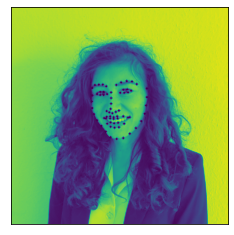

[[186 205]
 [185 219]
 [186 234]
 [190 248]
 [197 262]
 [207 275]
 [217 288]
 [228 301]
 [242 305]
 [257 303]
 [272 293]
 [286 280]
 [298 264]
 [306 247]
 [309 228]
 [311 209]
 [311 189]
 [186 188]
 [192 181]
 [201 180]
 [210 180]
 [218 184]
 [241 181]
 [252 175]
 [265 172]
 [277 173]
 [288 179]
 [229 198]
 [229 211]
 [229 224]
 [228 236]
 [219 241]
 [225 244]
 [232 246]
 [240 243]
 [247 240]
 [197 202]
 [204 197]
 [212 197]
 [220 202]
 [212 204]
 [204 204]
 [250 199]
 [257 192]
 [266 191]
 [275 194]
 [268 198]
 [259 199]
 [213 257]
 [219 254]
 [227 253]
 [235 255]
 [243 253]
 [257 253]
 [272 255]
 [259 270]
 [247 278]
 [237 279]
 [228 277]
 [220 270]
 [217 258]
 [227 258]
 [235 259]
 [244 258]
 [268 256]
 [245 268]
 [236 269]
 [228 267]]


In [49]:
rects = detector(image, 1)
from imutils import face_utils
import matplotlib.pyplot as plt
for (i, rect) in enumerate(rects):
    shape = predictor(image, rect)
    shape = face_utils.shape_to_np(shape)
    for (x, y) in shape:
        cv2.circle(image, (x, y), 1, (0, 255, 0), 3)
plt.figure()
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()
print(shape)
vec = shape

NameError: name 'triplot' is not defined

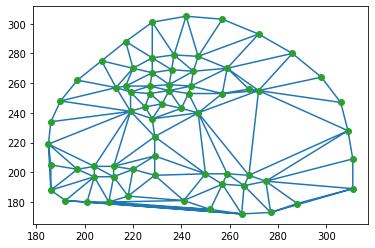

In [65]:
from scipy.spatial import Delaunay
tri = Delaunay(vec)
tri.simplices
plt.triplot(vec[:,0], vec[:,1], tri.simplices)
plt.plot(vec[:,0], vec[:,1], 'o')
plt.show(triplot)

In [232]:
file = open("Pictures/Faces/lali.txt", "w+")
 
# Saving the array in a text file
content = str(vec)
file.write(content)
file.close()
 
# Displaying the contents of the text file
file = open("Pictures/Faces/lali.txt", "r")
content = file.read()
 
print("\n", content)
file.close()


 [[186 205]
 [185 219]
 [186 234]
 [190 248]
 [197 262]
 [207 275]
 [217 288]
 [228 301]
 [242 305]
 [257 303]
 [272 293]
 [286 280]
 [298 264]
 [306 247]
 [309 228]
 [311 209]
 [311 189]
 [186 188]
 [192 181]
 [201 180]
 [210 180]
 [218 184]
 [241 181]
 [252 175]
 [265 172]
 [277 173]
 [288 179]
 [229 198]
 [229 211]
 [229 224]
 [228 236]
 [219 241]
 [225 244]
 [232 246]
 [240 243]
 [247 240]
 [197 202]
 [204 197]
 [212 197]
 [220 202]
 [212 204]
 [204 204]
 [250 199]
 [257 192]
 [266 191]
 [275 194]
 [268 198]
 [259 199]
 [213 257]
 [219 254]
 [227 253]
 [235 255]
 [243 253]
 [257 253]
 [272 255]
 [259 270]
 [247 278]
 [237 279]
 [228 277]
 [220 270]
 [217 258]
 [227 258]
 [235 259]
 [244 258]
 [268 256]
 [245 268]
 [236 269]
 [228 267]]


In [52]:
from scipy.spatial import Delaunay
tri = Delaunay(vec)

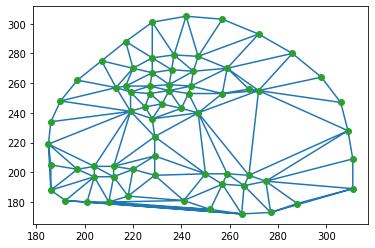

In [53]:
import matplotlib.pyplot as plt
plt.triplot(vec[:,0], vec[:,1], tri.simplices)
plt.plot(vec[:,0], vec[:,1], 'o')
plt.show()

array([[186, 206],
       [185, 221],
       [186, 235],
       [191, 249],
       [198, 263],
       [208, 275],
       [218, 288],
       [228, 301],
       [242, 305],
       [258, 303],
       [272, 293],
       [285, 281],
       [297, 265],
       [305, 248],
       [308, 229],
       [311, 210],
       [310, 190],
       [187, 188],
       [192, 181],
       [201, 180],
       [210, 180],
       [218, 184],
       [241, 181],
       [252, 175],
       [264, 172],
       [277, 173],
       [288, 179],
       [230, 198],
       [230, 211],
       [229, 223],
       [229, 236],
       [219, 241],
       [226, 244],
       [233, 246],
       [241, 243],
       [248, 240],
       [198, 202],
       [204, 197],
       [212, 197],
       [220, 202],
       [212, 204],
       [204, 204],
       [250, 199],
       [258, 192],
       [266, 191],
       [275, 194],
       [268, 198],
       [259, 199],
       [213, 257],
       [219, 254],
       [227, 253],
       [235, 255],
       [243,

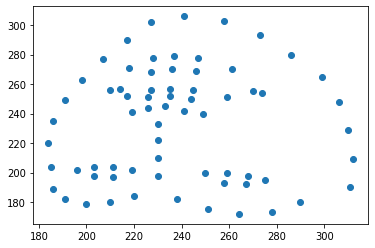

In [50]:
plt.plot(vec[:,0], vec[:,1], 'o')
points[:]

In [218]:
#PCA Anwendung auf 2d Graubild
def transform (percentage):
    percentage = percentage/100
    img_pca = PCA(n_components = percentage).fit(image)
    transformed = img_pca.transform(image)
    projection = img_pca.inverse_transform(transformed)
    plt.imshow(projection, cmap="gray")

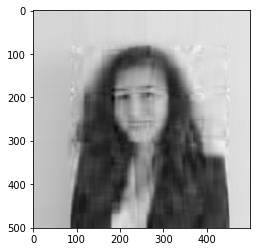

In [220]:
#Prozentangabe
transform(97)